Epoch 1/200


/Users/atulkumar/miniconda3/envs/bro/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27560382.0000 - val_loss: 13818091.0000
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 14689825.0000 - val_loss: 13776569.0000
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 23698352.0000 - val_loss: 13683806.0000
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 16263462.0000 - val_loss: 13503223.0000
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 18100578.0000 - val_loss: 13228591.0000
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 15294989.0000 - val_loss: 12840282.0000
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 15132400.0000 - val_loss: 12323511.0000
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 17031058.0000 - val_loss: 11729767.0000
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 13651792.0000 - val_loss: 11063717.0000
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 31675362.0000 - val_loss: 10348136.0000
Epo

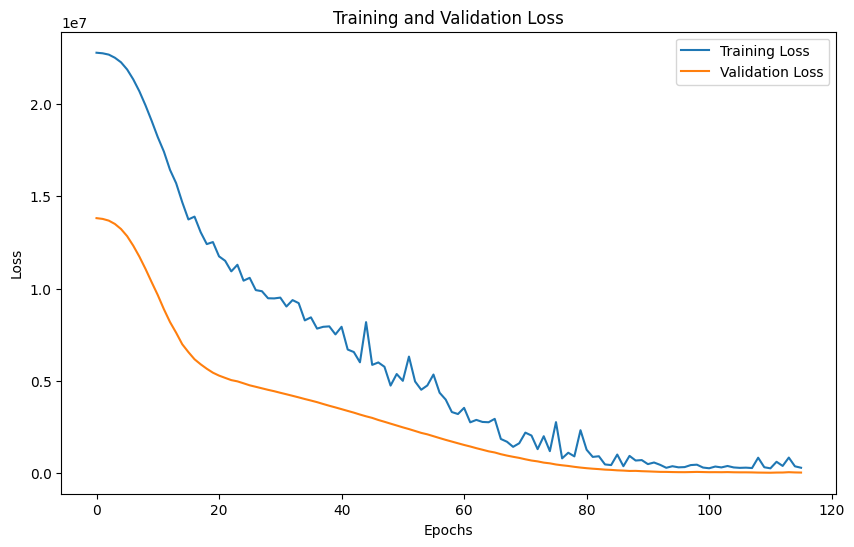

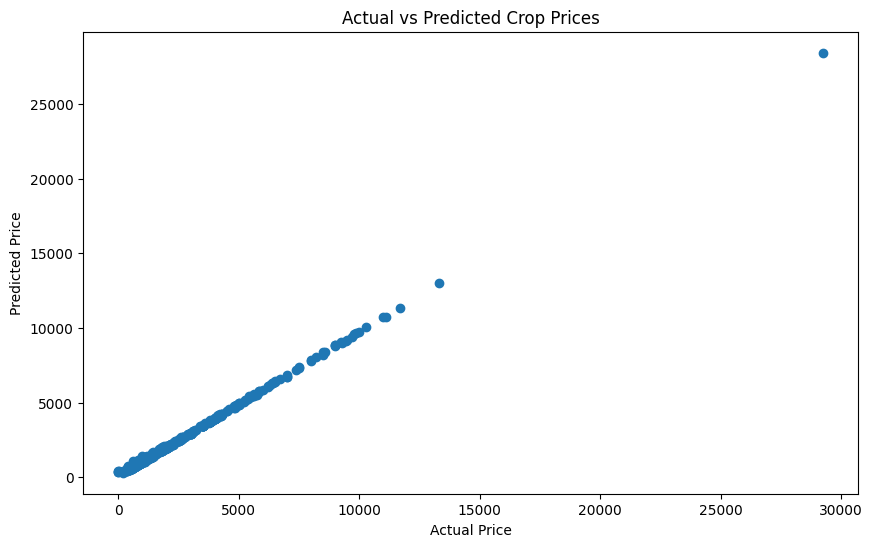

Mean Squared Error: 15162.634614900375


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
crop_data = pd.read_csv('crop_data.csv')

# Data Preprocessing Techniques
# Handling missing values for numeric columns
numeric_columns = crop_data.select_dtypes(include=['float64', 'int64']).columns
crop_data[numeric_columns] = crop_data[numeric_columns].fillna(crop_data[numeric_columns].mean())

# Handling missing values for non-numeric columns
non_numeric_columns = crop_data.select_dtypes(exclude=['float64', 'int64']).columns
crop_data[non_numeric_columns] = crop_data[non_numeric_columns].fillna(crop_data[non_numeric_columns].mode().iloc[0])

# Exclude non-numeric columns before feature scaling
crop_data_numeric = crop_data.select_dtypes(include=['float64', 'int64'])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(crop_data_numeric)
crop_data_scaled = pd.DataFrame(scaled_features, columns=crop_data_numeric.columns)

# Splitting the dataset into features and target variable
X = crop_data_scaled
y = crop_data['CROP_PRICE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, callbacks=[early_stopping])

# Predictions
y_pred = model.predict(X_test)

# Visualizing results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Crop Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Inferences
# Based on the loss curves, the model's performance can be analyzed. Additionally, the scatter plot provides insights into the model's prediction accuracy.
# Further analysis can be performed on model evaluation metrics and by exploring feature importance.
